In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv('Inventory_SupplyChain_Dataset.csv')

In [5]:
df.head()

,Date,Region,Category,Supplier,Warehouse,Order Status,Units Sold,Inventory Level,Transportation Cost,Order Accuracy,Lead Time (Days),Backorder,Cost of Goods Sold (COGS),Average Inventory,Warehouse Capacity
0,14-01-2020,North,Accessories,Supplier A,Warehouse 1,Fulfilled,302,2124,1103.838324,True,9,False,37820.05240,2048.0,5037
1,15-11-2020,East,Furniture,Supplier D,Warehouse 2,Fulfilled,741,1972,13163.007660,True,11,False,54396.17369,1213.0,9216
2,16-04-2020,East,Furniture,Supplier C,Warehouse 2,Fulfilled,940,454,9872.294126,True,17,False,24217.45462,1160.5,7699
3,17-04-2020,South,Accessories,Supplier D,Warehouse 2,Canceled,589,1867,4547.589932,True,3,False,38919.08005,3364.5,9271
4,18-04-2020,North,Accessories,Supplier C,Warehouse 2,Fulfilled,964,4862,11994.042310,True,21,False,59204.50683,3063.0,5828


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1200 non-null   object 
 1   Region                     1200 non-null   object 
 2   Category                   1200 non-null   object 
 3   Supplier                   1200 non-null   object 
 4   Warehouse                  1200 non-null   object 
 5   Order Status               1200 non-null   object 
 6   Units Sold                 1200 non-null   int64  
 7   Inventory Level            1200 non-null   int64  
 8   Transportation Cost        1200 non-null   float64
 9   Order Accuracy             1200 non-null   bool   
 10  Lead Time (Days)           1200 non-null   int64  
 11  Backorder                  1200 non-null   bool   
 12  Cost of Goods Sold (COGS)  1200 non-null   float64
 13  Average Inventory          1200 non-null   float

In [7]:
df.describe()

,Units Sold,Inventory Level,Transportation Cost,Lead Time (Days),Cost of Goods Sold (COGS),Average Inventory,Warehouse Capacity
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,533.892500,2530.473333,7723.518494,15.739167,59370.480017,2529.588333,7425.831667
std,275.469524,1416.945265,4202.727652,8.442187,44542.532052,1000.512796,1460.827133
min,50.000000,101.000000,509.098991,1.000000,1415.613541,235.000000,5002.000000
25%,298.000000,1261.750000,4145.882050,8.000000,22982.367025,1843.000000,6116.500000
50%,529.000000,2623.500000,7759.647979,16.000000,47773.376750,2496.500000,7427.000000
75%,777.000000,3726.250000,11154.018832,23.000000,88006.544317,3240.125000,8662.250000
max,999.000000,4999.000000,14997.814050,29.000000,190841.495400,4863.500000,9995.000000


In [8]:
# Check for missing values
df.isnull().sum()


Date                         0
Region                       0
Category                     0
Supplier                     0
Warehouse                    0
Order Status                 0
Units Sold                   0
Inventory Level              0
Transportation Cost          0
Order Accuracy               0
Lead Time (Days)             0
Backorder                    0
Cost of Goods Sold (COGS)    0
Average Inventory            0
Warehouse Capacity           0
dtype: int64

In [15]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [16]:
sns.set_theme(style="whitegrid")

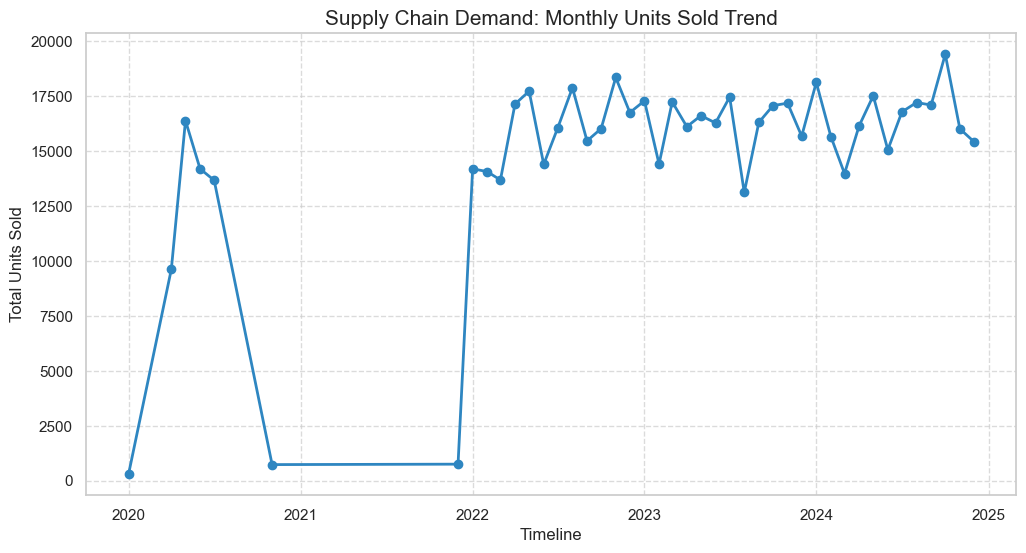

In [17]:
# --- Monthly Units Sold Trend ---
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units Sold'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='#2E86C1', linewidth=2)
plt.title('Supply Chain Demand: Monthly Units Sold Trend', fontsize=15)
plt.xlabel('Timeline', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

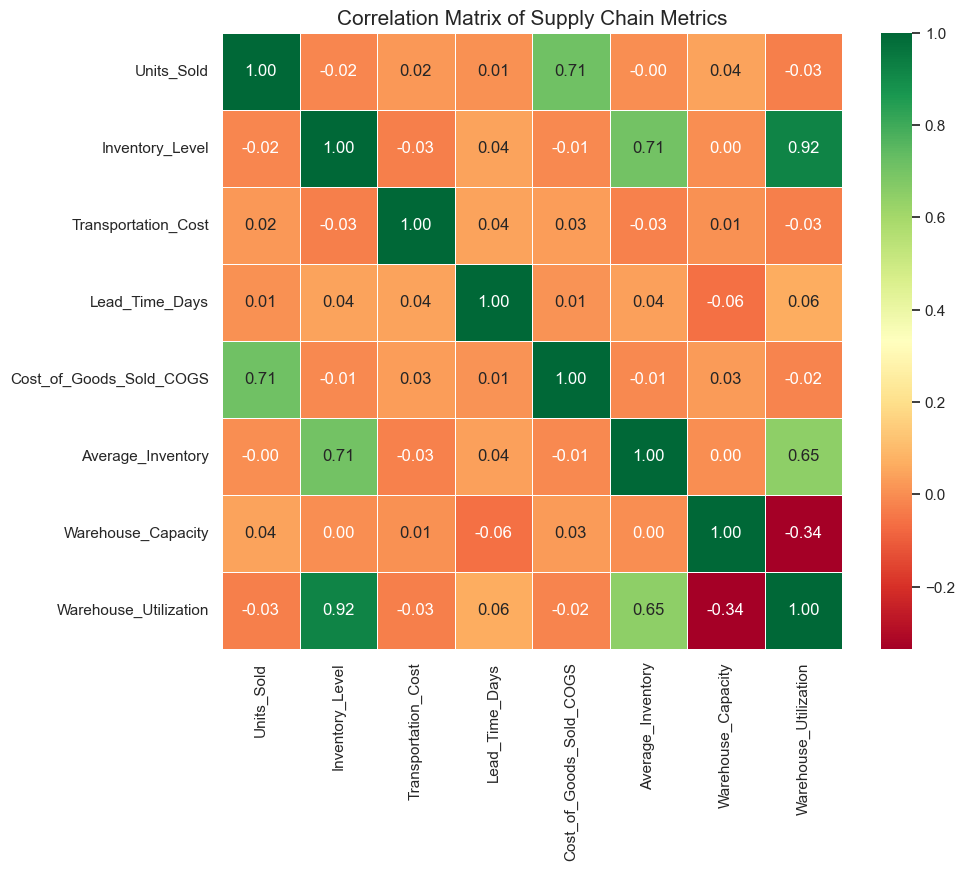

In [33]:
# --- Correlation Heatmap ---
# Helps identify which factors drive transportation costs or lead times

plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Supply Chain Metrics', fontsize=15)
plt.show()

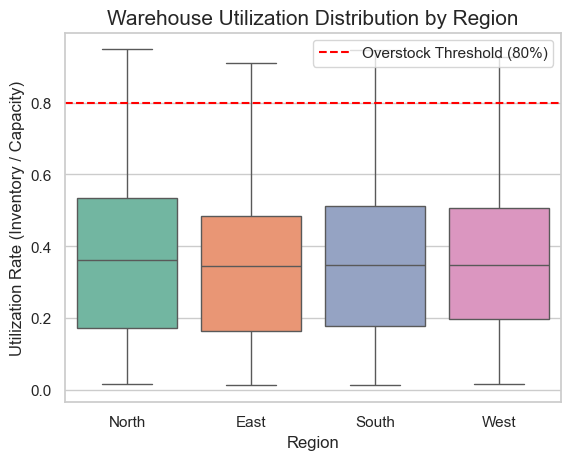

In [32]:
# --- Warehouse Utilization by Region ---

df['Warehouse_Utilization'] = df['Inventory_Level'] / df['Warehouse_Capacity']

sns.boxplot(data=df, x='Region', y='Warehouse_Utilization', hue='Region', palette='Set2')
plt.axhline(0.8, color='red', linestyle='--', label='Overstock Threshold (80%)')
plt.title('Warehouse Utilization Distribution by Region', fontsize=15)
plt.ylabel('Utilization Rate (Inventory / Capacity)')
plt.legend(loc='upper right')
plt.show()

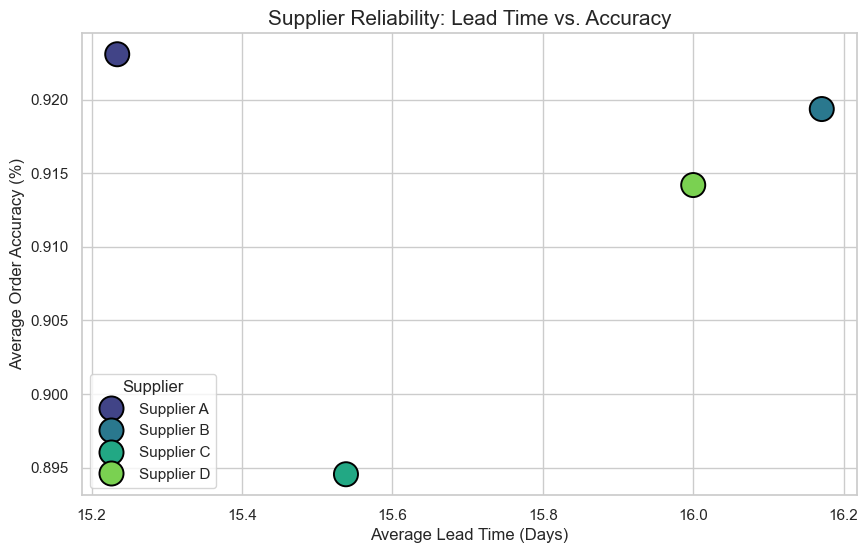

In [21]:
# --- Supplier Performance Scatter Plot ---
# Comparing Lead Time vs. Order Accuracy to find the best partners
supplier_perf = df.groupby('Supplier').agg({
    'Lead Time (Days)': 'mean',
    'Order Accuracy': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=supplier_perf, x='Lead Time (Days)', y='Order Accuracy', 
                hue='Supplier', s=300, palette='viridis', edgecolor='black')
plt.title('Supplier Reliability: Lead Time vs. Accuracy', fontsize=15)
plt.ylabel('Average Order Accuracy (%)')
plt.xlabel('Average Lead Time (Days)')
plt.show()